# Rf 2 1 1_Paramconv
Addition and convolution: working with a p.d.f. with a convolution operator in terms of a parameter

This tutorial requires FFT3 to be enabled.



**Author:** 04/2009 - Wouter Verkerke  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:45 AM.</small></i>

In [1]:
%%cpp -d
#include "RooRealVar.h"
#include "RooDataHist.h"
#include "RooGaussian.h"
#include "RooGenericPdf.h"
#include "RooFormulaVar.h"
#include "RooFFTConvPdf.h"
#include "RooPlot.h"
#include "TCanvas.h"
#include "TAxis.h"
#include "TH2.h"

In [2]:
%%cpp -d
// This is a workaround to make sure the namespace is used inside functions
using namespace RooFit;

Setup component pdfs
 ---------------------------------------

Gaussian g(x ; mean,sigma)

In [3]:
RooRealVar x("x", "x", -10, 10);
RooRealVar mean("mean", "mean", -3, 3);
RooRealVar sigma("sigma", "sigma", 0.5, 0.1, 10);
RooGaussian modelx("gx", "gx", x, mean, sigma);


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Block function in mean

In [4]:
RooRealVar a("a", "a", 2, 1, 10);
RooGenericPdf model_mean("model_mean", "abs(mean)<a", RooArgList(mean, a));

Convolution in mean parameter model = g(x,mean,sigma) (x) block(mean)

In [5]:
x.setBins(1000, "cache");
mean.setBins(50, "cache");
RooFFTConvPdf model("model", "model", mean, modelx, model_mean);

Configure convolution to construct a 2-d cache in (x,mean)
 rather than a 1-d cache in mean that needs to be recalculated
 for each value of x

In [6]:
model.setCacheObservables(x);
model.setBufferFraction(1.0);

Integrate model over mean projmodel = int model dmean

In [7]:
RooAbsPdf *projModel = model.createProjection(mean);

Generate 1000 toy events

In [8]:
RooDataHist *d = projModel->generateBinned(x, 1000);

[#1] INFO:Eval -- RooRealVar::setRange(mean) new range named 'refrange_fft_model' created with bounds [-3,3]
[#0] WARNING:Eval -- The FFT convolution 'model' will run with 50 bins. A decent accuracy for difficult convolutions is typically only reached with n >= 1000. Suggest to increase the number of bins of the observable 'mean'.
[#1] INFO:NumericIntegration -- RooRealIntegral::init(gx_Int[mean,x]) using numeric integrator RooIntegrator1D to calculate Int(mean)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_mean_Int[mean]) using numeric integrator RooIntegrator1D to calculate Int(mean)
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(model) creating new cache 0x7f6ed04720c0 with pdf gx_CONV_model_mean_CACHE_Obs[x,mean] for nset (x,mean) with code 0


Fit p.d.f. to toy data

In [9]:
projModel->fitTo(*d, Verbose());

[#0] WARNING:Eval -- The FFT convolution 'model' will run with 50 bins. A decent accuracy for difficult convolutions is typically only reached with n >= 1000. Suggest to increase the number of bins of the observable 'mean'.
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(model) creating new cache 0x7f6ed0a9c440 with pdf gx_CONV_model_mean_CACHE_Obs[x,mean] for nset (x,mean) with code 0 from preexisting content.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#0] WARNING:Minization -- RooMinimizerFcn::synchronize: WARNING: no initial error estimate available for a: using 0.5
[#0] WARNING:Minization -- RooMinimizerFcn::synchronize: WARNING: no initial error estimate available for sigma: using 0.2
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a            2.00000e+00  5.00000e-01    1.00000e+00  1.00000e+01
     

Plot data and fitted p.d.f.

In [10]:
RooPlot *frame = x.frame(Bins(25));
d->plotOn(frame);
projModel->plotOn(frame);

[#0] WARNING:Eval -- The FFT convolution 'model' will run with 50 bins. A decent accuracy for difficult convolutions is typically only reached with n >= 1000. Suggest to increase the number of bins of the observable 'mean'.
[#1] INFO:NumericIntegration -- RooRealIntegral::init(gx_Int[mean,x]) using numeric integrator RooIntegrator1D to calculate Int(mean)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_mean_Int[mean]) using numeric integrator RooIntegrator1D to calculate Int(mean)
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(model) creating new cache 0x7f6ed09ac3d0 with pdf gx_CONV_model_mean_CACHE_Obs[x,mean] for nset (x,mean) with code 0


Make 2d histogram of model(x;mean)

In [11]:
TH1 *hh = model.createHistogram("hh", x, Binning(50), YVar(mean, Binning(50)), ConditionalObservables(mean));
hh->SetTitle("histogram of model(x|mean)");
hh->SetLineColor(kBlue);

[#0] WARNING:Eval -- The FFT convolution 'model' will run with 50 bins. A decent accuracy for difficult convolutions is typically only reached with n >= 1000. Suggest to increase the number of bins of the observable 'mean'.
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(model) creating new cache 0x7f6ed08c3210 with pdf gx_CONV_model_mean_CACHE_Obs[x,mean] for nset (x) with code 0 from preexisting content.


Draw frame on canvas

In [12]:
TCanvas *c = new TCanvas("rf211_paramconv", "rf211_paramconv", 800, 400);
c->Divide(2);
c->cd(1);
gPad->SetLeftMargin(0.15);
frame->GetYaxis()->SetTitleOffset(1.4);
frame->Draw();
c->cd(2);
gPad->SetLeftMargin(0.20);
hh->GetZaxis()->SetTitleOffset(2.5);
hh->Draw("surf");

Draw all canvases 

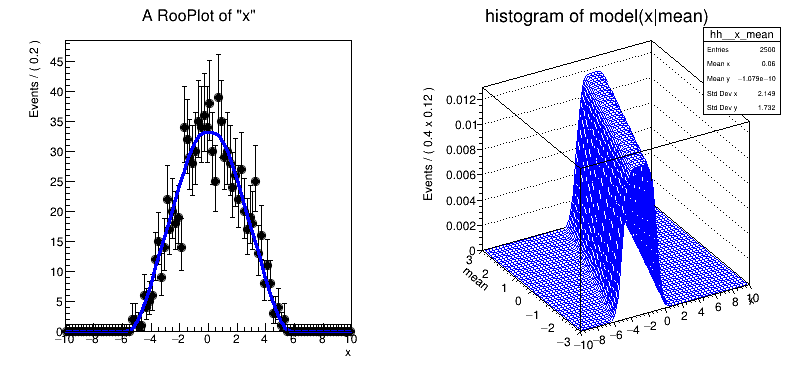

In [13]:
gROOT->GetListOfCanvases()->Draw()